<a href="https://colab.research.google.com/github/AshvinVignesh/Sentiment-Analysis/blob/master/model/SA_SINHALA_3_CONTD(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 2.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import pandas as pd
import re
import string

In [3]:
DF = pd.read_csv('cleaned.csv')

In [4]:
DF.head(10)

,Text,Class,PureText,ConEmoji,Emojis,Con_emoji_meanings
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,NaN,NaN,NaN
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි,Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,NaN,NaN,NaN
2,කිමද තරම් කොහේදෝ විදපු ගලක් උරන මා මිතුරු...,Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,NaN,NaN,NaN
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ,😂 😂,😂 😂,face tears joy face tears joy
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,NaN,NaN,NaN
5,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,NaN,NaN,NaN
6,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල්ක...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,NaN,NaN,NaN
7,මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින්දා ...,Neutral,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...,😏 😅,😏 😅,smirking face grinning face sweat
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,NaN,NaN,NaN
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,NaN,NaN,NaN


In [5]:
DF.isna().sum()

Text                     0
Class                    0
PureText                 0
ConEmoji              1255
Emojis                1046
Con_emoji_meanings    1255
dtype: int64

In [6]:
DF = DF.fillna('N/A')

In [7]:
DF.isna().sum()

Text                  0
Class                 0
PureText              0
ConEmoji              0
Emojis                0
Con_emoji_meanings    0
dtype: int64

In [8]:
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    else:
        return text


In [9]:
DF['Con_emoji_meanings'] =  DF['Con_emoji_meanings'].apply(remove_punctuation)

In [10]:
DF.head(10)

,Text,Class,PureText,ConEmoji,Emojis,Con_emoji_meanings
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,N/A,N/A,NA
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි,Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,N/A,N/A,NA
2,කිමද තරම් කොහේදෝ විදපු ගලක් උරන මා මිතුරු...,Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,N/A,N/A,NA
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ,😂 😂,😂 😂,face tears joy face tears joy
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,N/A,N/A,NA
5,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,N/A,N/A,NA
6,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල්ක...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,N/A,N/A,NA
7,මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින්දා ...,Neutral,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...,😏 😅,😏 😅,smirking face grinning face sweat
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,N/A,N/A,NA
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,N/A,N/A,NA


In [11]:
import nltk
from nltk.stem import PorterStemmer

# download necessary nltk resources (only needed once)
nltk.download('punkt')

# create a stemmer object
stemmer = PorterStemmer()
# define a DataFrame with text data


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
DF['Con_emoji_meanings'] = DF['Con_emoji_meanings'].fillna('')

In [13]:
DF['Con_emoji_meanings'] =  DF['Con_emoji_meanings'].apply(nltk.word_tokenize)

In [14]:
DF['Con_emoji_meanings'] =  DF['Con_emoji_meanings'].apply(lambda x: [stemmer.stem(word) for word in x])

In [15]:
DF['Con_emoji_meanings']  =  DF['Con_emoji_meanings'] .apply(lambda x: " ".join(x))

# **CONVERT EMOJI INTO SINHALA**

In [16]:
# english-sinhala dictionary
dictionary = {}
df= pd.read_csv('emojiSinhala.csv')
dictionary_file = df["En,sinhala"]

for line in dictionary_file:
    key, value = line.strip().split(",")
    dictionary[key] = value

In [17]:
# to check whether the string contains English words(any)
def translate_english(x):
    for word1 in x.split():
        new_word = ''.join(i for i in word1 if not i.isdigit())
        x = x.replace(word1, new_word)
    for word in x.split():
        word2 = "".join(l for l in word if l not in string.punctuation)
        if re.match('[a-zA-Z]', word2) is not None:
            word1 = word2.lower()
            translated_word = dictionary.get(word1)
            if translated_word is None:
                translated_word = ''
            x = x.replace(word, translated_word)
    return x

In [18]:
DF['Con_emoji_meanings_sinhala'] = DF['Con_emoji_meanings'].apply(translate_english)

In [19]:
DF.head(20)

,Text,Class,PureText,ConEmoji,Emojis,Con_emoji_meanings,Con_emoji_meanings_sinhala
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,N/A,N/A,na,
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි,Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,N/A,N/A,na,
2,කිමද තරම් කොහේදෝ විදපු ගලක් උරන මා මිතුරු...,Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,N/A,N/A,na,
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ,😂 😂,😂 😂,face tear joy face tear joy,මුහුණ කඳුළු සතුට මුහුණ කඳුළු සතුට
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,N/A,N/A,na,
5,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,N/A,N/A,na,
6,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල්ක...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,N/A,N/A,na,
7,මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින්දා ...,Neutral,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...,😏 😅,😏 😅,smirk face grin face sweat,මුහුණ සිනහව මුහුණ දහඩිය
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,N/A,N/A,na,
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,N/A,N/A,na,


In [20]:
DF['PureText + Con_emoji_meanings_sinhala'] = DF['PureText'] + ' ' +DF['Con_emoji_meanings_sinhala']

In [21]:
DF.head(10)

,Text,Class,PureText,ConEmoji,Emojis,Con_emoji_meanings,Con_emoji_meanings_sinhala,PureText + Con_emoji_meanings_sinhala
0,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,Neutral,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න,N/A,N/A,na,,ඝරසරප චිත්‍රපටය පහළ තියෙන එකෙන් කරගන්න
1,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි,Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්,N/A,N/A,na,,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්
2,කිමද තරම් කොහේදෝ විදපු ගලක් උරන මා මිතුරු...,Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...,N/A,N/A,na,,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන...
3,එහෙම කොහොමද උනේ 😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ,😂 😂,😂 😂,face tear joy face tear joy,මුහුණ කඳුළු සතුට මුහුණ කඳුළු සතුට,එහෙම කොහොමද උනේ පරය අපිව අයින් කරල නේ ...
4,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,Political,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...,N/A,N/A,na,,විමලයා ගොනෙක් වගෙ එකෙ මෑරෙන්න හදනවා පරය රටට ව...
5,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...,N/A,N/A,na,,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාග...
6,ලැජ්ජයි ස⁣හෝදරයා විදිහ දැක්කාම ඔබලාගේ කුලල්ක...,Racist,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...,N/A,N/A,na,,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම ඔබලාගේ ...
7,මං තම්බි වගේද පෙන්නෙ 😏 මං බ්‍රහස්පතින්දා ...,Neutral,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...,😏 😅,😏 😅,smirk face grin face sweat,මුහුණ සිනහව මුහුණ දහඩිය,ඇයි මං තම්බි වගේද පෙන්නෙ මං බ්‍රහස්පතින්...
8,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,Racist,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...,N/A,N/A,na,,ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහිරපඉල්ලන...
9,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,Racist,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...,N/A,N/A,na,,පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට වාසි පැත්තේ...


# **SENTIMENT ANALYSIS FOR (PureText + Con_emoji_meanings_sinhala)**

In [22]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score, confusion_matrix,classification_report,ConfusionMatrixDisplay

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn import linear_model

In [23]:
max_features = 4500
count_vector = CountVectorizer(max_features = max_features)  
X = count_vector.fit_transform(DF['PureText + Con_emoji_meanings_sinhala']).toarray() 
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
print("most using {} words: {} ".format(max_features, count_vector.get_feature_names_out()))

most using 4500 words: ['අක' 'අකම' 'අකව' ... 'ෆල' 'ෆව' 'ෆස'] 


In [25]:
print(count_vector.vocabulary_)

{'ඝරසරප': 760, 'රපටය': 1616, 'පහළ': 1281, 'එක': 383, 'කරගන': 612, 'කක': 538, 'හර': 2071, 'යයක': 1514, 'නත': 1119, 'එප': 430, 'ඉත': 253, 'මද': 1393, 'තරම': 961, 'ඇත': 208, 'දප': 1013, 'ගලක': 720, 'උරන': 366, 'පරය': 1250, 'එහ': 454, 'උන': 333, 'අප': 53, 'අය': 81, 'කරල': 639, 'කඳ': 582, 'සත': 1930, 'මලය': 1426, 'වග': 1751, 'හදනව': 2041, 'රටට': 1585, 'ඩක': 850, 'කරපන': 634, 'යක': 1460, 'ජය': 798, 'දරය': 1034, 'යන': 1482, 'ඔබල': 503, 'ලල': 1731, 'ගන': 698, 'තම': 942, 'වහබ': 1858, 'සහ': 2011, 'මළ': 1450, 'ඇය': 229, 'රහස': 1673, 'පත': 1214, 'දර': 1029, 'එන': 422, 'එතක': 414, 'දට': 998, 'අඩව': 21, 'වක': 1744, 'අල': 103, 'ලන': 1706, 'ආවනම': 184, 'නහව': 1185, 'දහඩ': 1057, 'ඉට': 248, 'උත': 329, 'ඉල': 278, 'ලනස': 1711, 'එකය': 404, 'නහ': 1180, 'රපඉල': 1614, 'රප': 1613, 'රන': 1610, 'පර': 1240, 'දය': 1022, 'නව': 1158, 'කවදත': 657, 'ඉන': 262, 'ඉදග': 256, 'ශර': 1876, 'වර': 1814, 'ගට': 683, 'රට': 1582, 'බහ': 1353, 'තර': 950, 'සය': 1976, 'ඉද': 254, 'දරව': 1036, 'මට': 1374, 'අවක': 106, 'ශය': 1873, 'අපග': 

In [26]:
e = pd.DataFrame(X,columns=count_vector.get_feature_names_out())
e

,අක,අකම,අකව,අඛණ,අග,අගන,අගම,අගය,අගයක,අගයන,...,ළවට,ළහර,ෆක,ෆට,ෆන,ෆය,ෆර,ෆල,ෆව,ෆස
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
# convert classes to number
encoder = LabelEncoder()
y = encoder.fit_transform(DF['Class'])
y

array([0, 0, 0, ..., 2, 2, 2])

In [29]:
X.shape

(1679, 2122)

In [30]:
y.shape

(1679,)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1343, 2122)
(336, 2122)
(1343,)
(336,)


# **HYPERPARAMETER FOR RANDOM FOREST FOR**

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_hy = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=15)
rf_hy.fit(X_train, y_train)
print("Training Accuracy :" , accuracy_score(y_train, rf_hy.predict(X_train))*100 )

predictions2 = rf_hy.predict(X_test)
#print(confusion_matrix(Y_test,predictions2))  
print(classification_report(y_test,predictions2))  
print("TEST ACCURACY  : ",accuracy_score(y_test, predictions2)*100)

Training Accuracy : 98.8830975428146
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       194
           1       0.62      0.52      0.56        31
           2       0.74      0.45      0.56        31
           3       0.48      0.48      0.48        25
           4       0.15      0.07      0.10        29
           5       1.00      0.15      0.27        26

    accuracy                           0.67       336
   macro avg       0.62      0.43      0.46       336
weighted avg       0.66      0.67      0.63       336

TEST ACCURACY  :  66.96428571428571


In [35]:
print(confusion_matrix(y_test,predictions2)) 

[[177   3   1   7   6   0]
 [ 11  16   0   2   2   0]
 [ 12   3  14   1   1   0]
 [  9   1   3  12   0   0]
 [ 22   2   0   3   2   0]
 [ 18   1   1   0   2   4]]


In [36]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test, predictions2,average='macro')
print( 'Precision : {}'.format(precision))
print ('Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))
print ('Support   : {}'.format(support))

Precision : 0.6161527079979838
Recall    : 0.4304874567653371
F-score   : 0.4604008893565743
Support   : None


In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
model = AdaBoostClassifier(base_estimator=rf_hy, random_state=42)
model.fit(X_train, y_train)
y_pred_adaboost=model.predict(X_test)
print(f'Test score {accuracy_score(y_pred_adaboost,y_test)*100}')

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test score 63.69047619047619


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
model1= GradientBoostingClassifier(learning_rate=0.05,random_state=42)
model1.fit(X_train, y_train)
y_pred_GBM=model1.predict(X_test)
print(f'Test score {accuracy_score(y_pred_GBM,y_test)*100}')

Test score 67.26190476190477


In [62]:
import xgboost as xgb

In [67]:
model2=xgb.XGBClassifier(base_estimator=rf_hy,random_state=42,learning_rate=0.08)
model2.fit(X_train, y_train)
y_pred_xgboost=model2.predict(X_test)
print(f'Test score {accuracy_score(y_pred_xgboost,y_test)*100}')

[06:31:43] WARNING: ../src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

Test score 69.94047619047619


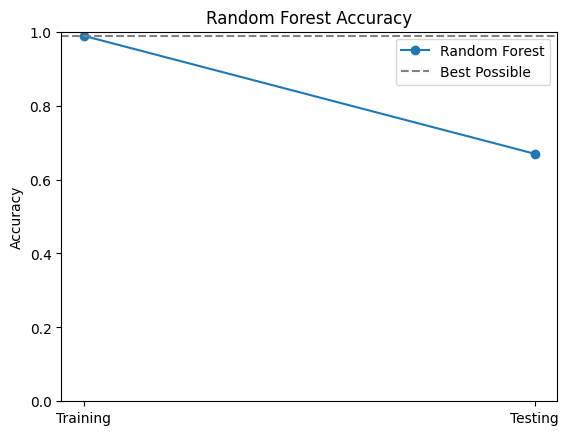

In [78]:
train_acc = accuracy_score(y_train, rf_hy.predict(X_train))
test_acc = accuracy_score(y_test, rf_hy.predict(X_test))

# Create a comparison line graph
x_labels = ['Training', 'Testing']
y_values = [train_acc, test_acc]
x = np.arange(len(x_labels))
fig, ax = plt.subplots()
ax.plot(x, y_values, '-o', label='Random Forest')
ax.axhline(y=max(y_values), linestyle='--', color='gray', label='Best Possible')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim([0, 1])
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Accuracy')
ax.legend()

plt.show()


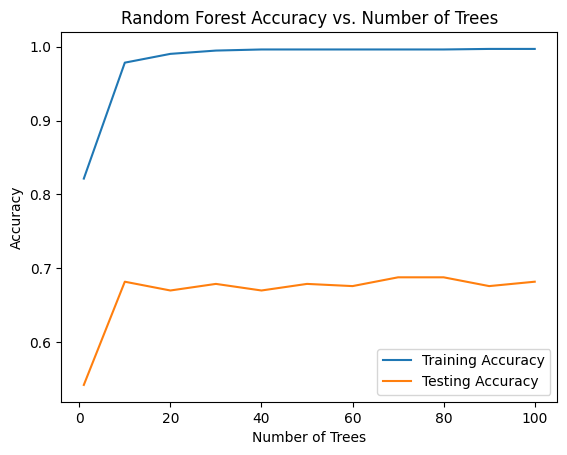

In [79]:
n_trees = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_acc = []
test_acc = []

for n in n_trees:
    rf_hy = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_hy.fit(X_train, y_train)
    train_acc.append(rf_hy.score(X_train, y_train))
    test_acc.append(rf_hy.score(X_test, y_test))

# Plot the results
plt.plot(n_trees, train_acc, label='Training Accuracy')
plt.plot(n_trees, test_acc, label='Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.legend()
plt.show()

In [38]:
rf_hy1 = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=0.5, min_samples_leaf=5, random_state=42)

# **SVM**

In [40]:
from sklearn.svm import LinearSVC

In [41]:
sv = LinearSVC(class_weight={0:0.11 ,1: 0.12 ,2:0.67 ,3: 0.03, 4:0.05 })
sv.fit(X_train, y_train)

print("Training Accuracy :" , accuracy_score(y_train, sv.predict(X_train))*100 )

predictions3 = sv.predict(X_test)
#print(confusion_matrix(Y_test,predictions3))  
print(classification_report(y_test,predictions3,zero_division=1))  
print(" TEST ACCURACY : ",accuracy_score(y_test, predictions3)*100)

Training Accuracy : 95.90469099032018
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       194
           1       0.58      0.48      0.53        31
           2       0.53      0.58      0.55        31
           3       0.92      0.48      0.63        25
           4       0.25      0.07      0.11        29
           5       0.33      0.54      0.41        26

    accuracy                           0.66       336
   macro avg       0.56      0.50      0.50       336
weighted avg       0.66      0.66      0.65       336

 TEST ACCURACY :  66.07142857142857


In [42]:
from sklearn.svm import LinearSVC
sv = LinearSVC(random_state=42)
sv.fit(X_train, y_train)

print("Training Accuracy :" , accuracy_score(y_train, sv.predict(X_train))*100 )

predictions3 = sv.predict(X_test)
#print(confusion_matrix(Y_test,predictions3))  
print(classification_report(y_test,predictions3,zero_division=1))  
print(" TEST ACCURACY : ",accuracy_score(y_test, predictions3)*100)

Training Accuracy : 98.73417721518987
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       194
           1       0.67      0.45      0.54        31
           2       0.56      0.48      0.52        31
           3       0.57      0.52      0.54        25
           4       0.18      0.10      0.13        29
           5       0.34      0.42      0.38        26

    accuracy                           0.65       336
   macro avg       0.51      0.47      0.48       336
weighted avg       0.63      0.65      0.63       336

 TEST ACCURACY :  64.88095238095238


In [43]:
import numpy as np

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

# y_train_scaled =scaler.fit_transform(y_train.astype(np.float32))
# y_test_scaled =scaler.transform(y_test.astype(np.float32))


lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)
y_pred = lin_clf.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred)*100)

99.6276991809382


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [45]:
from sklearn.svm import SVC
svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000]) # We use an SVC with an RBF kernel
y_pred = svm_clf.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred)*100)

80.56589724497394


In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter

In [47]:
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=7.681418290703918, gamma=0.0032472628027155007; total time=   4.5s
[CV] END ...C=7.681418290703918, gamma=0.0032472628027155007; total time=   2.3s
[CV] END ...C=7.681418290703918, gamma=0.0032472628027155007; total time=   3.2s
[CV] END ....C=8.466906926189044, gamma=0.003920001498314853; total time=   3.4s
[CV] END ....C=8.466906926189044, gamma=0.003920001498314853; total time=   5.1s
[CV] END ....C=8.466906926189044, gamma=0.003920001498314853; total time=   3.3s
[CV] END ....C=9.551492465149709, gamma=0.019984615881774276; total time=   3.1s
[CV] END ....C=9.551492465149709, gamma=0.019984615881774276; total time=   2.2s
[CV] END ....C=9.551492465149709, gamma=0.019984615881774276; total time=   2.4s
[CV] END .....C=8.146759710373843, gamma=0.02569161190404462; total time=   1.8s
[CV] END .....C=8.146759710373843, gamma=0.02569161190404462; total time=   1.5s
[CV] END .....C=8.146759710373843, gamma=0.02569

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fd8c89baee0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fd8c8a8e160>},
                   verbose=2)

In [48]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred)*100)

60.71428571428571


# **HYP DECISION TREE**

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt3 = DecisionTreeClassifier( max_leaf_nodes =30, random_state=42)
dt3.fit(X_train, y_train)
print("Training Accuracy :" , accuracy_score(y_train, dt3.predict(X_train))*100 )

predictions4 = dt3.predict(X_test)
#print(confusion_matrix(Y_test,predictions4))  
print(classification_report(y_test,predictions4,zero_division=1))  
print("TEST ACCURACY SCORE : ",accuracy_score(y_test, predictions4)*100)

Training Accuracy : 67.60982874162323
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       194
           1       0.49      0.55      0.52        31
           2       0.67      0.19      0.30        31
           3       0.73      0.44      0.55        25
           4       1.00      0.00      0.00        29
           5       0.45      0.19      0.27        26

    accuracy                           0.65       336
   macro avg       0.67      0.38      0.40       336
weighted avg       0.67      0.65      0.59       336

TEST ACCURACY SCORE :  64.88095238095238


# **Ada Boost Classifier + Decision Tree**

In [96]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators= 50, base_estimator= dt3)
abc.fit(X_train,y_train)

print("Training Accuracy :" , accuracy_score(y_train, abc.predict(X_train))*100)

predictions5 = abc.predict(X_test)
print(confusion_matrix(y_test,predictions5))
print(classification_report(y_test,predictions5))
print("TEST ACCURACY : ",accuracy_score(y_test, predictions5)*100)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy : 84.43782576321668
[[177   2   1   2   9   3]
 [ 16  12   1   0   2   0]
 [ 18   3   9   1   0   0]
 [ 14   0   0  10   1   0]
 [ 27   0   0   0   2   0]
 [ 18   0   1   0   1   6]]
              precision    recall  f1-score   support

           0       0.66      0.91      0.76       194
           1       0.71      0.39      0.50        31
           2       0.75      0.29      0.42        31
           3       0.77      0.40      0.53        25
           4       0.13      0.07      0.09        29
           5       0.67      0.23      0.34        26

    accuracy                           0.64       336
   macro avg       0.61      0.38      0.44       336
weighted avg       0.63      0.64      0.60       336

TEST ACCURACY :  64.28571428571429


In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('manhattan')

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


In [83]:
knn = KNeighborsClassifier(n_neighbors=11 ,metric='manhattan')

In [84]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [85]:
predictions6 = knn.predict(X_test)
print(confusion_matrix(y_test,predictions6))
print(classification_report(y_test,predictions5))
print("TEST ACCURACY : ",accuracy_score(y_test, predictions6)*100)

[[194   0   0   0   0   0]
 [ 31   0   0   0   0   0]
 [ 31   0   0   0   0   0]
 [ 24   0   0   0   1   0]
 [ 29   0   0   0   0   0]
 [ 26   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.64      0.91      0.75       194
           1       0.67      0.26      0.37        31
           2       0.69      0.29      0.41        31
           3       0.69      0.36      0.47        25
           4       0.20      0.10      0.14        29
           5       0.38      0.12      0.18        26

    accuracy                           0.62       336
   macro avg       0.54      0.34      0.39       336
weighted avg       0.59      0.62      0.57       336

TEST ACCURACY :  57.738095238095234


In [86]:
full_text= 'ඝරසරප චිත්‍රපටය පහළ  තියෙන    එකෙන් කරගන්න    මුහුණ  මුහුණ සමග දහඩිය'

In [87]:
A=[]
A.append(full_text)
A

['ඝරසරප චිත්\u200dරපටය පහළ  තියෙන    එකෙන් කරගන්න    මුහුණ  මුහුණ සමග දහඩිය']

In [88]:
test_vector = count_vector.transform(A)
test_vector = test_vector.toarray()

In [89]:
encoder = LabelEncoder()
y = encoder.fit_transform(DF['Class'])
y

array([0, 0, 0, ..., 2, 2, 2])

In [90]:
text_predict_class = encoder.inverse_transform(rf_hy.predict(test_vector))
print(A[0], 'is: ',text_predict_class[0])

ඝරසරප චිත්‍රපටය පහළ  තියෙන    එකෙන් කරගන්න    මුහුණ  මුහුණ සමග දහඩිය is:  Neutral


In [91]:
import pickle
from sklearn.preprocessing import LabelEncoder # to convert classes to number 
encoder = LabelEncoder()